In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_train = pd.read_csv('../../data/processed/train.csv')
df_test = pd.read_csv('../../data/raw/test.csv')

In [4]:
df_train_int = df_train.select_dtypes(include=[np.integer, np.float64])
df_test_int = df_test.select_dtypes(include=[np.integer])

In [5]:
y = df_train_int['SalePrice']
x = df_train_int.drop('SalePrice', axis=1)

In [6]:
x

,Id,Surface_logement,Surface_habitable,Surface_basement,Surface_1ere_plan,Surface_2eme_plan,Surface_garage,Surface_pavage,Annee_construction,OverallQual,OverallCond,Annee_remodage,Annee_garage,Nombre_chemines,Nombre_basement_baignoire,Nombre_baignoire,Nombre_chambres_par_etage,Nombre_cuisine_par_etage
0,1,8450,1710,856,856,854,548,0,2003,7,5,2003,2003.0,0,1,2,3,1
1,2,9600,1262,1262,1262,0,460,298,1976,6,8,1976,1976.0,1,0,2,3,1
2,3,11250,1786,920,920,866,608,0,2001,7,5,2002,2001.0,1,1,2,3,1
3,4,9550,1717,756,961,756,642,0,1915,7,5,1970,1998.0,1,1,1,3,1
4,5,14260,2198,1145,1145,1053,836,192,2000,8,5,2000,2000.0,1,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,1456,7917,1647,953,953,694,460,0,1999,6,5,2000,1999.0,1,0,2,3,1
1345,1457,13175,2073,1542,2073,0,500,349,1978,6,6,1988,1978.0,2,1,2,3,1
1346,1458,9042,2340,1152,1188,1152,252,0,1941,7,9,2006,1941.0,2,0,2,4,1
1347,1459,9717,1078,1078,1078,0,240,366,1950,5,6,1996,1950.0,0,1,1,2,1


In [7]:
from sklearn.tree import DecisionTreeRegressor

hgbdt_model = DecisionTreeRegressor(random_state=1)
hgbdt_model.fit(x, y)

DecisionTreeRegressor(random_state=1)

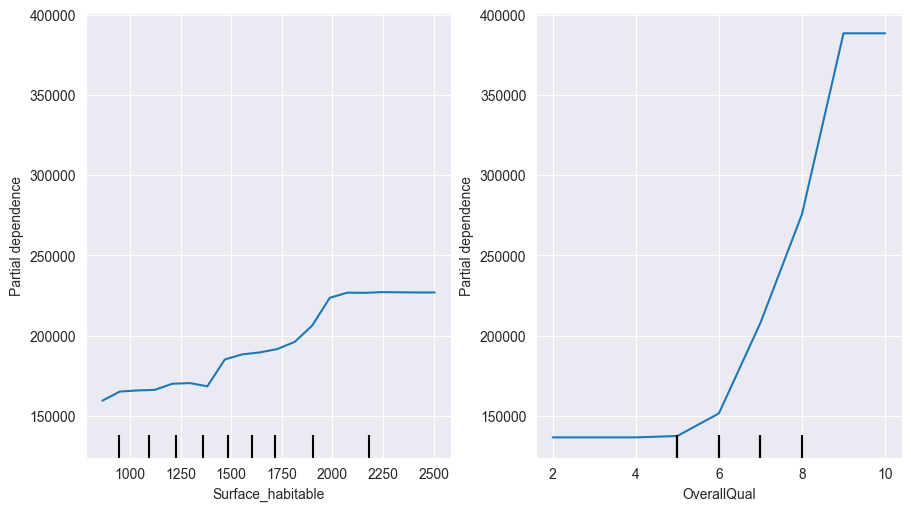

In [8]:
from time import time

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

features_info = {
    "features": ["Surface_habitable", "OverallQual"],
    "kind": "average",
}
_, ax = plt.subplots(ncols=2, nrows=1, figsize=(9, 5), constrained_layout=True)
tic = time()
display = PartialDependenceDisplay.from_estimator(
    hgbdt_model,
    x,
    **features_info,
    ax=ax,
    **common_params,
)